In [8]:
import cv2  # OpenCV for image processing
import os   # For file and folder operations
import time  # To generate unique timestamps for saved files

def process_real_world_vegetation(image_path, output_folder, original_crop_size=(350, 350), final_size=(50, 50)):
    """
    Parameters:
    - image_path: Path to the input image
    - output_folder: Folder where the processed image will be saved
    - original_crop_size: Size (width, height) to crop from the center of the image
    - final_size: Final size (width, height) to resize the cropped image
    """

    # Create the output folder if it doesn't already exist
    os.makedirs(output_folder, exist_ok=True)
    
    # Load the image in grayscale mode
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # If image loading fails, show an error message and exit
    if image is None:
        print(f"❌ Error: Could not load image {image_path}")
        return
    
    # Get the original image dimensions
    h, w = image.shape

    # Ensure the crop size does not exceed the image dimensions
    crop_w, crop_h = min(w, original_crop_size[0]), min(h, original_crop_size[1])
    
    # Calculate the top-left corner of the crop (centered crop)
    crop_x = (w - crop_w) // 2
    crop_y = (h - crop_h) // 2

    # Perform the center crop
    cropped = image[crop_y:crop_y + crop_h, crop_x:crop_x + crop_w]

    # Resize the cropped image to the final desired size
    resized = cv2.resize(cropped, final_size, interpolation=cv2.INTER_LINEAR)

    # Create a timestamp to ensure each output file has a unique name
    timestamp = time.strftime("%Y%m%d-%H%M%S")

    # Define the output filename and full path
    output_filename = f"real_world_50x50_{timestamp}.png"
    output_path = os.path.join(output_folder, output_filename)

    # Save the processed image to disk
    cv2.imwrite(output_path, resized)

    # Print a success message with the location of the saved image
    print(f"✅ Real-world vegetation image processed and saved at: {output_path}")

# Set the input image path and the folder where processed images will be saved
real_world_image_path = r"C:\Users\princess\OneDrive\Pictures\Screenshots\Dryland Data\a15.png"
output_folder = r"C:\Users\princess\OneDrive\Pictures\Screenshots\processed_images"

# Run the processing function
process_real_world_vegetation(real_world_image_path, output_folder)



✅ Real-world vegetation image processed and saved at: C:\Users\princess\OneDrive\Pictures\Screenshots\processed_images\real_world_50x50_20250408-193042.png


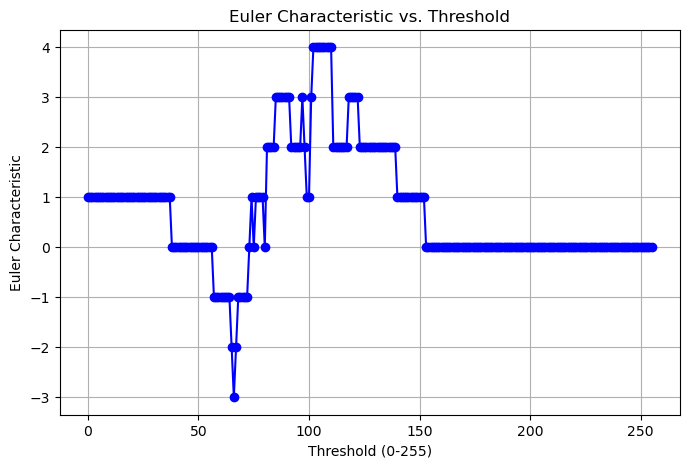

✅ Graph saved at: C:\Users\princess\OneDrive\Pictures\Screenshots\processed_images\euler_characteristic_real_world_50x50_20250408-193042_20250408-193242.png
✅ Euler characteristic values saved at: C:\Users\princess\OneDrive\Pictures\Screenshots\processed_images\euler_characteristics_real_world_50x50_20250408-193042_20250408-193242.txt


In [9]:
# Import required libraries
import cv2  # For image loading and processing
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
from skimage.measure import label, euler_number  # For computing Euler characteristic
import os  # For file/folder handling
import time  # For generating timestamps

# Function to load, resize, crop, and scale an image
def process_vegetation_image(image_path, crop_size, output_size, scale_factor=0.17):
    
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load the image in grayscale
    
    if image is None:
        raise ValueError("Image not found. Check the file path.")  # Error if image loading fails

    # Resize the image to make it smaller (scaling down)
    scaled_image = cv2.resize(image, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)
    
    # Get the new height and width of the scaled image
    h, w = scaled_image.shape
    # Calculate cropping dimensions (center crop)
    crop_w, crop_h = min(w, crop_size[0]), min(h, crop_size[1])
    start_x = (w - crop_w) // 2
    start_y = (h - crop_h) // 2
    cropped_image = scaled_image[start_y:start_y + crop_h, start_x:start_x + crop_w]

    # Resize the cropped image to the final size (e.g., 50x50)
    final_image = cv2.resize(cropped_image, output_size, interpolation=cv2.INTER_LINEAR)
    
    return final_image  # Return the processed image

# Function to compute the Euler characteristic from a binary image
def compute_euler_characteristic(binary_image):
   
    labeled_img = label(binary_image, connectivity=2)  # Label connected components
    euler_char = euler_number(labeled_img)  # Compute Euler number from the labeled image
    return euler_char

# Function to analyze how the Euler characteristic changes across thresholds
def analyze_euler_characteristic(image_path, crop_size, output_size, scale_factor=0.17, output_folder="C:\\Users\\princess\\OneDrive\\Pictures\\Screenshots\\processed_images"):
    
    processed_image = process_vegetation_image(image_path, crop_size, output_size, scale_factor)  # Step 1: Process the image

    euler_values = []  # List to store Euler values for each threshold
    thresholds = range(256)  # Threshold values from 0 to 255
    
    # Step 2: Apply thresholding and compute Euler number at each level
    for i in thresholds:
        _, binary_image = cv2.threshold(processed_image, i, 255, cv2.THRESH_BINARY)  # Convert image to binary using threshold
        euler_char = compute_euler_characteristic(binary_image)  # Compute Euler characteristic
        euler_values.append(euler_char)  # Store the result

    # Step 3: Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Step 4: Create filenames with timestamps to avoid overwriting files
    image_name = os.path.splitext(os.path.basename(image_path))[0]
    timestamp = time.strftime("%Y%m%d-%H%M%S")

    # Step 5: Save the Euler graph as an image
    graph_filename = f"euler_characteristic_{image_name}_{timestamp}.png"
    graph_path = os.path.join(output_folder, graph_filename)
    
    plt.figure(figsize=(8, 5))
    plt.plot(thresholds, euler_values, marker='o', linestyle='-', color='b')  # Plot Euler values
    plt.xlabel("Threshold (0-255)")
    plt.ylabel("Euler Characteristic")
    plt.title("Euler Characteristic vs. Threshold")
    plt.grid(True)
    plt.savefig(graph_path, dpi=300)  # Save the graph as a PNG image
    plt.show()  # Display the graph

    print(f"✅ Graph saved at: {graph_path}")

    # Step 6: Save the Euler values into a text file
    text_filename = f"euler_characteristics_{image_name}_{timestamp}.txt"
    text_path = os.path.join(output_folder, text_filename)
    np.savetxt(text_path, euler_values, fmt="%d")  # Save the list of values
    print(f"✅ Euler characteristic values saved at: {text_path}")

    return euler_values  # Return the list of Euler characteristics

# Provide path to the input image and define crop/output sizes
image_path = r"C:\Users\princess\OneDrive\Pictures\Screenshots\processed_images\real_world_50x50_20250408-193042.png"
crop_size = (50, 50)  # Crop size from the center of the image
output_size = (50, 50)  # Final output size of the image

# Run the analysis and get the Euler characteristic values
euler_characteristics = analyze_euler_characteristic(image_path, crop_size, output_size)

